2023_Fall Final_project, 
Topic : Image classification using pytorch

import Lib

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image
from IPython.display import Image, display
from sklearn.preprocessing import LabelEncoder

import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import torch.utils.data as Data
from keras import models, layers

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf


test mps

In [2]:
use_mps = False
mps_num = 0

if torch.backends.mps.is_available():
    use_mps = True
    mps_num = torch.device('mps')
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

test code

In [3]:
use_cuda = False
cuda_num = 0
if torch.cuda.is_available():
    use_cuda = True
    cuda_numm = torch.cuda.device_count()
    cuda_=0
device = torch.device('cuda'+str(cuda_) if use_cuda else 'cpu')

# Load data

In [4]:
labels = os.listdir('C:/Users/User/Desktop/2023_DeepLearning_FinalProject/2022_Summer_DeepLearning_Final_Project_CNN/data/natural_images')
print(labels)


['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [5]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = r"C:/Users/User/Desktop/2023_DeepLearning_FinalProject/2022_Summer_DeepLearning_Final_Project_CNN/data/natural_images/{0}/".format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (28,28))
        image_resized_2 = tf.reshape(image_resized, (3,28,28))
        x_data.append(np.array(image_resized_2))
        y_data.append(label)
        pass
    pass


In [6]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)
x_data = x_data.astype('float32')

y_encoded = LabelEncoder().fit_transform(y_data)


X = torch.tensor(x_data)
y = torch.tensor(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)
train_dataset = Data.TensorDataset(X_train, y_train)
test_dataset = Data.TensorDataset(X_test, y_test)

the shape of X is:  (6899, 3, 28, 28) and that of Y is:  (6899,)


In [7]:
image.shape

(256, 256, 3)

In [8]:
image_resized.shape

(28, 28, 3)

In [9]:
X_train.shape

torch.Size([6209, 3, 28, 28])

In [10]:
y_train.shape

torch.Size([6209])

Define hyperparameter

In [11]:
image_size  = 28  
num_classes = 8  
num_epochs  =  130
batch_size  =  100
depth = [4, 8]

In [12]:

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True )


len1 = len(test_dataset)
indices_val  = range(len1 // 2)
indices_test = range(len1 // 2, len1)
sampler_val  = torch.utils.data.sampler.SubsetRandomSampler(indices_val)
sampler_test = torch.utils.data.sampler.SubsetRandomSampler(indices_test)

validation_loader = torch.utils.data.DataLoader(dataset =test_dataset, batch_size = batch_size,
                                                sampler = sampler_val)
test_loader       = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, 
                                                sampler = sampler_test)


Define metric

In [13]:
def rightness(pred, y):
    global i1
    pred = torch.max(pred, 1)[1]
    rights = pred.eq(y).sum()
    return rights, len(y)


# Build model

In [14]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        
        self.conv1 = nn.Conv2d(3, depth[0], 5, padding = 2) 
        
        
        self.pool = nn.MaxPool2d(2, 2) 
        
        
        self.conv2 = nn.Conv2d(depth[0], depth[1], 5, padding = 2) 
        
        
        self.fc1 = nn.Linear(image_size//4 * image_size//4 * depth[1] , 256) 
        
        
        self.fc2 = nn.Linear(256, num_classes) 
        
   
    def forward(self, x):
       
        x = F.relu(self.conv1(x)) 
        
        x = self.pool(x) 
        
        x = F.relu(self.conv2(x)) 
                       
        x = self.pool(x) 
        
        x = x.view(-1, image_size//4 * image_size//4 * depth[1])
        
        x = F.relu(self.fc1(x)) 
        
        x = F.dropout(x, training=self.training) 
        x = self.fc2(x) 
        
        x = F.log_softmax(x, dim = 1)
        return x
    
    
    def retrieve_features(self, x):
       
        tempx1 = F.relu(self.conv1(x)) 
        
        tempx2 = F.relu(self.conv2(self.pool(tempx1))) 

# Model training

Epoch: 0 [1000/6209 (16%)]	Loss: 4.356232	訓練正確率: 14.30%	校驗正確率: 12.75%
Epoch: 0 [2000/6209 (32%)]	Loss: 3.219996	訓練正確率: 13.10%	校驗正確率: 14.49%
Epoch: 0 [3000/6209 (48%)]	Loss: 2.841544	訓練正確率: 13.07%	校驗正確率: 15.36%
Epoch: 0 [4000/6209 (64%)]	Loss: 2.650367	訓練正確率: 13.32%	校驗正確率: 15.36%
Epoch: 0 [5000/6209 (81%)]	Loss: 2.536150	訓練正確率: 13.30%	校驗正確率: 15.65%
Epoch: 0 [6000/6209 (97%)]	Loss: 2.459942	訓練正確率: 12.92%	校驗正確率: 15.65%
Epoch: 0 [6209/6209 (100%)]	Loss: 2.441984	訓練正確率: 12.88%	校驗正確率: 15.65%
Epoch: 1 [1000/6209 (16%)]	Loss: 2.076202	訓練正確率: 14.10%	校驗正確率: 15.65%
Epoch: 1 [2000/6209 (32%)]	Loss: 2.077098	訓練正確率: 13.25%	校驗正確率: 15.65%
Epoch: 1 [3000/6209 (48%)]	Loss: 2.077018	訓練正確率: 13.13%	校驗正確率: 15.65%
Epoch: 1 [4000/6209 (64%)]	Loss: 2.077287	訓練正確率: 13.45%	校驗正確率: 15.65%
Epoch: 1 [5000/6209 (81%)]	Loss: 2.077093	訓練正確率: 13.72%	校驗正確率: 15.65%
Epoch: 1 [6000/6209 (97%)]	Loss: 2.076739	訓練正確率: 13.68%	校驗正確率: 15.65%
Epoch: 1 [6209/6209 (100%)]	Loss: 2.077276	訓練正確率: 13.59%	校驗正確率: 15.65%
Epoch: 2 [1000/620

Epoch: 17 [1000/6209 (16%)]	Loss: 1.303904	訓練正確率: 53.00%	校驗正確率: 53.91%
Epoch: 17 [2000/6209 (32%)]	Loss: 1.296404	訓練正確率: 54.10%	校驗正確率: 57.39%
Epoch: 17 [3000/6209 (48%)]	Loss: 1.296524	訓練正確率: 53.97%	校驗正確率: 57.68%
Epoch: 17 [4000/6209 (64%)]	Loss: 1.277064	訓練正確率: 54.62%	校驗正確率: 58.84%
Epoch: 17 [5000/6209 (81%)]	Loss: 1.256828	訓練正確率: 55.20%	校驗正確率: 56.81%
Epoch: 17 [6000/6209 (97%)]	Loss: 1.251827	訓練正確率: 55.38%	校驗正確率: 58.26%
Epoch: 17 [6209/6209 (100%)]	Loss: 1.250432	訓練正確率: 55.34%	校驗正確率: 61.16%
Epoch: 18 [1000/6209 (16%)]	Loss: 1.175734	訓練正確率: 57.00%	校驗正確率: 57.97%
Epoch: 18 [2000/6209 (32%)]	Loss: 1.162544	訓練正確率: 57.85%	校驗正確率: 59.13%
Epoch: 18 [3000/6209 (48%)]	Loss: 1.178822	訓練正確率: 56.83%	校驗正確率: 58.26%
Epoch: 18 [4000/6209 (64%)]	Loss: 1.182258	訓練正確率: 57.55%	校驗正確率: 59.71%
Epoch: 18 [5000/6209 (81%)]	Loss: 1.185166	訓練正確率: 57.26%	校驗正確率: 56.81%
Epoch: 18 [6000/6209 (97%)]	Loss: 1.193651	訓練正確率: 56.92%	校驗正確率: 58.26%
Epoch: 18 [6209/6209 (100%)]	Loss: 1.189524	訓練正確率: 57.01%	校驗正確率: 58.84%
Epoc

Epoch: 33 [5000/6209 (81%)]	Loss: 0.757196	訓練正確率: 72.82%	校驗正確率: 67.54%
Epoch: 33 [6000/6209 (97%)]	Loss: 0.756634	訓練正確率: 72.72%	校驗正確率: 65.51%
Epoch: 33 [6209/6209 (100%)]	Loss: 0.750724	訓練正確率: 72.72%	校驗正確率: 63.77%
Epoch: 34 [1000/6209 (16%)]	Loss: 0.768918	訓練正確率: 71.90%	校驗正確率: 66.96%
Epoch: 34 [2000/6209 (32%)]	Loss: 0.744131	訓練正確率: 73.60%	校驗正確率: 67.54%
Epoch: 34 [3000/6209 (48%)]	Loss: 0.737448	訓練正確率: 73.93%	校驗正確率: 66.96%
Epoch: 34 [4000/6209 (64%)]	Loss: 0.739214	訓練正確率: 73.55%	校驗正確率: 67.25%
Epoch: 34 [5000/6209 (81%)]	Loss: 0.751796	訓練正確率: 73.24%	校驗正確率: 66.96%
Epoch: 34 [6000/6209 (97%)]	Loss: 0.757336	訓練正確率: 72.70%	校驗正確率: 68.70%
Epoch: 34 [6209/6209 (100%)]	Loss: 0.760276	訓練正確率: 72.80%	校驗正確率: 68.70%
Epoch: 35 [1000/6209 (16%)]	Loss: 0.709940	訓練正確率: 75.10%	校驗正確率: 65.80%
Epoch: 35 [2000/6209 (32%)]	Loss: 0.726572	訓練正確率: 73.10%	校驗正確率: 64.93%
Epoch: 35 [3000/6209 (48%)]	Loss: 0.729421	訓練正確率: 73.30%	校驗正確率: 63.77%
Epoch: 35 [4000/6209 (64%)]	Loss: 0.734570	訓練正確率: 73.15%	校驗正確率: 65.80%
Epoc

Epoch: 50 [3000/6209 (48%)]	Loss: 0.517459	訓練正確率: 80.93%	校驗正確率: 69.57%
Epoch: 50 [4000/6209 (64%)]	Loss: 0.517088	訓練正確率: 80.82%	校驗正確率: 68.41%
Epoch: 50 [5000/6209 (81%)]	Loss: 0.523275	訓練正確率: 80.72%	校驗正確率: 68.12%
Epoch: 50 [6000/6209 (97%)]	Loss: 0.527465	訓練正確率: 80.47%	校驗正確率: 68.12%
Epoch: 50 [6209/6209 (100%)]	Loss: 0.529079	訓練正確率: 80.42%	校驗正確率: 68.70%
Epoch: 51 [1000/6209 (16%)]	Loss: 0.558429	訓練正確率: 78.70%	校驗正確率: 67.25%
Epoch: 51 [2000/6209 (32%)]	Loss: 0.546918	訓練正確率: 78.90%	校驗正確率: 69.57%
Epoch: 51 [3000/6209 (48%)]	Loss: 0.539157	訓練正確率: 79.40%	校驗正確率: 68.99%
Epoch: 51 [4000/6209 (64%)]	Loss: 0.544791	訓練正確率: 79.15%	校驗正確率: 68.99%
Epoch: 51 [5000/6209 (81%)]	Loss: 0.546205	訓練正確率: 79.36%	校驗正確率: 67.54%
Epoch: 51 [6000/6209 (97%)]	Loss: 0.547056	訓練正確率: 79.52%	校驗正確率: 67.54%
Epoch: 51 [6209/6209 (100%)]	Loss: 0.539788	訓練正確率: 79.59%	校驗正確率: 67.83%
Epoch: 52 [1000/6209 (16%)]	Loss: 0.513476	訓練正確率: 81.90%	校驗正確率: 67.54%
Epoch: 52 [2000/6209 (32%)]	Loss: 0.495447	訓練正確率: 81.95%	校驗正確率: 67.83%
Epoc

Epoch: 67 [2000/6209 (32%)]	Loss: 0.349082	訓練正確率: 86.70%	校驗正確率: 67.83%
Epoch: 67 [3000/6209 (48%)]	Loss: 0.365019	訓練正確率: 86.07%	校驗正確率: 68.12%
Epoch: 67 [4000/6209 (64%)]	Loss: 0.369378	訓練正確率: 85.88%	校驗正確率: 67.25%
Epoch: 67 [5000/6209 (81%)]	Loss: 0.374001	訓練正確率: 85.76%	校驗正確率: 69.28%
Epoch: 67 [6000/6209 (97%)]	Loss: 0.375553	訓練正確率: 85.77%	校驗正確率: 67.83%
Epoch: 67 [6209/6209 (100%)]	Loss: 0.374352	訓練正確率: 85.71%	校驗正確率: 70.72%
Epoch: 68 [1000/6209 (16%)]	Loss: 0.334504	訓練正確率: 87.30%	校驗正確率: 69.57%
Epoch: 68 [2000/6209 (32%)]	Loss: 0.365139	訓練正確率: 86.65%	校驗正確率: 68.41%
Epoch: 68 [3000/6209 (48%)]	Loss: 0.362864	訓練正確率: 86.47%	校驗正確率: 68.70%
Epoch: 68 [4000/6209 (64%)]	Loss: 0.372543	訓練正確率: 85.78%	校驗正確率: 68.41%
Epoch: 68 [5000/6209 (81%)]	Loss: 0.376727	訓練正確率: 85.78%	校驗正確率: 70.72%
Epoch: 68 [6000/6209 (97%)]	Loss: 0.377990	訓練正確率: 85.80%	校驗正確率: 66.38%
Epoch: 68 [6209/6209 (100%)]	Loss: 0.380541	訓練正確率: 85.63%	校驗正確率: 68.12%
Epoch: 69 [1000/6209 (16%)]	Loss: 0.386940	訓練正確率: 86.30%	校驗正確率: 68.12%
Epoc

Epoch: 83 [6000/6209 (97%)]	Loss: 0.282171	訓練正確率: 89.63%	校驗正確率: 65.80%
Epoch: 83 [6209/6209 (100%)]	Loss: 0.281218	訓練正確率: 89.60%	校驗正確率: 66.09%
Epoch: 84 [1000/6209 (16%)]	Loss: 0.424647	訓練正確率: 83.90%	校驗正確率: 65.22%
Epoch: 84 [2000/6209 (32%)]	Loss: 0.383845	訓練正確率: 85.65%	校驗正確率: 66.38%
Epoch: 84 [3000/6209 (48%)]	Loss: 0.366421	訓練正確率: 86.33%	校驗正確率: 66.67%
Epoch: 84 [4000/6209 (64%)]	Loss: 0.355023	訓練正確率: 86.90%	校驗正確率: 70.14%
Epoch: 84 [5000/6209 (81%)]	Loss: 0.347913	訓練正確率: 87.06%	校驗正確率: 68.70%
Epoch: 84 [6000/6209 (97%)]	Loss: 0.337331	訓練正確率: 87.32%	校驗正確率: 68.99%
Epoch: 84 [6209/6209 (100%)]	Loss: 0.333110	訓練正確率: 87.32%	校驗正確率: 69.28%
Epoch: 85 [1000/6209 (16%)]	Loss: 0.263254	訓練正確率: 90.30%	校驗正確率: 67.54%
Epoch: 85 [2000/6209 (32%)]	Loss: 0.262615	訓練正確率: 90.25%	校驗正確率: 69.28%
Epoch: 85 [3000/6209 (48%)]	Loss: 0.256000	訓練正確率: 90.20%	校驗正確率: 68.99%
Epoch: 85 [4000/6209 (64%)]	Loss: 0.272155	訓練正確率: 89.75%	校驗正確率: 70.14%
Epoch: 85 [5000/6209 (81%)]	Loss: 0.275799	訓練正確率: 89.78%	校驗正確率: 68.41%
Epoc

Epoch: 100 [4000/6209 (64%)]	Loss: 0.247783	訓練正確率: 91.12%	校驗正確率: 68.41%
Epoch: 100 [5000/6209 (81%)]	Loss: 0.243836	訓練正確率: 91.30%	校驗正確率: 68.41%
Epoch: 100 [6000/6209 (97%)]	Loss: 0.243850	訓練正確率: 91.23%	校驗正確率: 67.83%
Epoch: 100 [6209/6209 (100%)]	Loss: 0.241874	訓練正確率: 91.25%	校驗正確率: 68.12%
Epoch: 101 [1000/6209 (16%)]	Loss: 0.328181	訓練正確率: 89.40%	校驗正確率: 67.54%
Epoch: 101 [2000/6209 (32%)]	Loss: 0.308733	訓練正確率: 89.60%	校驗正確率: 69.57%
Epoch: 101 [3000/6209 (48%)]	Loss: 0.301257	訓練正確率: 89.63%	校驗正確率: 66.96%
Epoch: 101 [4000/6209 (64%)]	Loss: 0.295907	訓練正確率: 89.60%	校驗正確率: 67.54%
Epoch: 101 [5000/6209 (81%)]	Loss: 0.290810	訓練正確率: 89.48%	校驗正確率: 69.28%
Epoch: 101 [6000/6209 (97%)]	Loss: 0.293218	訓練正確率: 89.30%	校驗正確率: 67.25%
Epoch: 101 [6209/6209 (100%)]	Loss: 0.289960	訓練正確率: 89.26%	校驗正確率: 68.41%
Epoch: 102 [1000/6209 (16%)]	Loss: 0.253707	訓練正確率: 90.10%	校驗正確率: 67.54%
Epoch: 102 [2000/6209 (32%)]	Loss: 0.244571	訓練正確率: 90.60%	校驗正確率: 68.99%
Epoch: 102 [3000/6209 (48%)]	Loss: 0.240157	訓練正確率: 90.87%	校驗正確

Epoch: 116 [6209/6209 (100%)]	Loss: 0.281210	訓練正確率: 89.66%	校驗正確率: 68.12%
Epoch: 117 [1000/6209 (16%)]	Loss: 0.223899	訓練正確率: 91.50%	校驗正確率: 68.99%
Epoch: 117 [2000/6209 (32%)]	Loss: 0.228179	訓練正確率: 91.55%	校驗正確率: 69.28%
Epoch: 117 [3000/6209 (48%)]	Loss: 0.228858	訓練正確率: 91.67%	校驗正確率: 69.28%
Epoch: 117 [4000/6209 (64%)]	Loss: 0.233505	訓練正確率: 91.53%	校驗正確率: 68.12%
Epoch: 117 [5000/6209 (81%)]	Loss: 0.224240	訓練正確率: 91.78%	校驗正確率: 70.43%
Epoch: 117 [6000/6209 (97%)]	Loss: 0.224985	訓練正確率: 91.72%	校驗正確率: 71.01%
Epoch: 117 [6209/6209 (100%)]	Loss: 0.223964	訓練正確率: 91.66%	校驗正確率: 69.28%
Epoch: 118 [1000/6209 (16%)]	Loss: 0.223958	訓練正確率: 91.40%	校驗正確率: 68.70%
Epoch: 118 [2000/6209 (32%)]	Loss: 0.225179	訓練正確率: 91.35%	校驗正確率: 68.70%
Epoch: 118 [3000/6209 (48%)]	Loss: 0.217133	訓練正確率: 91.53%	校驗正確率: 70.14%
Epoch: 118 [4000/6209 (64%)]	Loss: 0.217155	訓練正確率: 91.62%	校驗正確率: 70.72%
Epoch: 118 [5000/6209 (81%)]	Loss: 0.218609	訓練正確率: 91.90%	校驗正確率: 69.86%
Epoch: 118 [6000/6209 (97%)]	Loss: 0.219385	訓練正確率: 91.87%	校驗正確

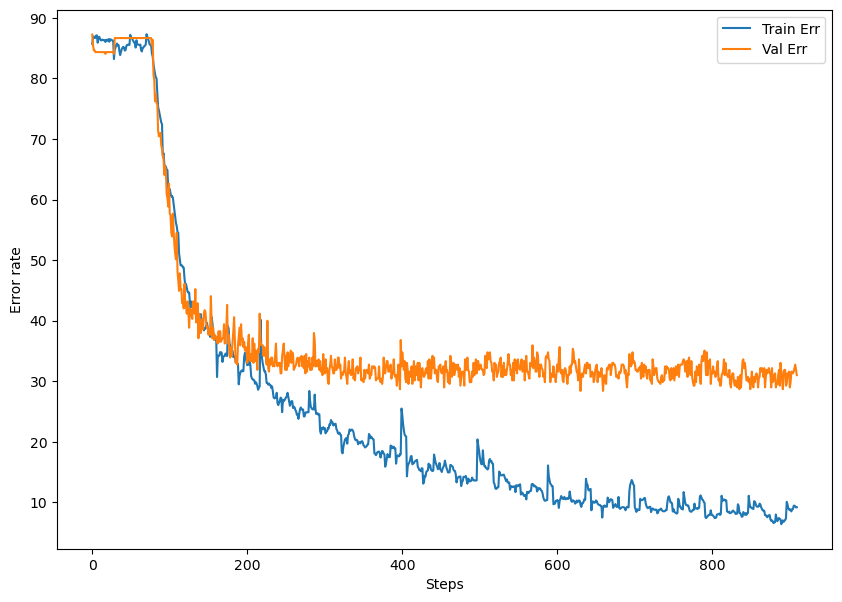

In [15]:
net = ConvNet() 
cost = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 
net.to(device)


record  = [] 
weights = [] 
for epoch in range(num_epochs):
    train_total = len(train_loader.dataset)
    train_right, train_curr_total = 0, 0
    batchloss = []
   
    for data, target in train_loader:
        if use_cuda:
           data = data.cuda()
           target = target.cuda()     
        net.train() 
        optimizer.zero_grad() 
        predict = net(data) 
        loss = cost(predict, target)
        loss.backward() 
        optimizer.step() 
        
        right, total = rightness(predict, target) 
        train_right += right                      
        train_curr_total += total                 
        batchloss.append(loss.detach().cpu())     
        
        if (train_curr_total % (10*batch_size)==0) or (train_curr_total==train_total): 
            net.eval()      # Disable drop
            val_right, val_total = 0, 0
            for (data_v, target_v) in validation_loader:
                if use_cuda:
                   data_v = data_v.cuda()
                   target_v = target.cuda_v()
                predict = net(data_v) 
                right, total = rightness(predict, target_v) 
                val_right += right
                val_total += total
            
            train_right_ = (100.*train_right/train_curr_total).cpu()
            val_right_   = (100.*val_right/val_total).cpu()
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t訓練正確率: {:.2f}%\t校驗正確率: {:.2f}%'\
                  .format(epoch, train_curr_total, train_total, 100.*train_curr_total/train_total, 
                  np.mean(batchloss, dtype=float), train_right_, val_right_))
            
            record.append((100 - train_right_, 100 - val_right_))
            
            weights.append([net.conv1.weight.detach().clone().cpu(), net.conv1.bias.detach().clone().cpu(), 
                            net.conv2.weight.detach().clone().cpu(), net.conv2.bias.detach().clone().cpu()])

record = np.array(record)
plt.figure(figsize = (10,7))
plt.xlabel('Steps')
plt.ylabel('Error rate')
plt.plot(record[:,0], label = 'Train Err')
plt.plot(record[:,1], label = 'Val Err')
plt.legend()
plt.show()
                    
                                    

# Model testing

In [16]:
test_right, test_total = 0, 0
for data_t, target_t in test_loader:
    if use_cuda:
       data_t = data_t.cuda()
       target = target.cuda()
    predict = net(data_t) 
    right, total = rightness(predict, target_t) 
    test_right += right
    test_total += total

In [17]:
print('Test accurate: {}'.format(100. * test_right / test_total))

Test accurate: 69.27536010742188
